In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
import os
import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join('Resources/heart.csv'))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
columns = list(df.columns)
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
# check the data if there is any missing data points per column
missing_values_count = df.isnull().sum()

In [8]:
# look at the # of missing points in the columns
missing_values_count[0:13]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

# Exploratory Data Analysis

In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = df.target.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Target",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Target",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [11]:
#Percentage of patients with or without disease
count_with_disease = len(df[df.target == 1])
count_no_disease = len(df[df.target == 0])
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((count_with_disease / (len(df.target))*100)))
print("Percentage of Patients Have not Heart Disease: {:.2f}%".format((count_no_disease / (len(df.target))*100)))

Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Have not Heart Disease: 45.54%


In [12]:
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = df.sex.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Sex",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Sex",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [13]:
#Percentage of male/female patients
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((count_female / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((count_male / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


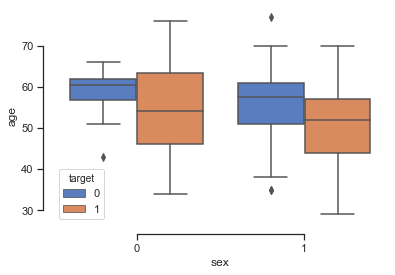

In [14]:
sns.set(style="ticks", palette="muted")
sns.boxplot(x="sex", y="age", hue="target", data=df)
sns.despine(offset=10, trim=True)

In [15]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = df.age
hist_data = [x1]
group_labels = ['Age']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[0, 5, 10])
fig.show()

In [16]:
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = df.age.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Age",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Age",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

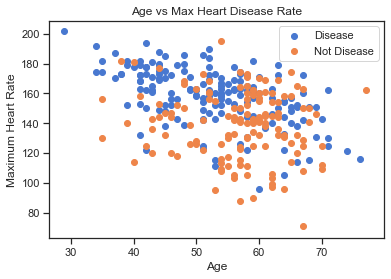

In [17]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.title("Age vs Max Heart Disease Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

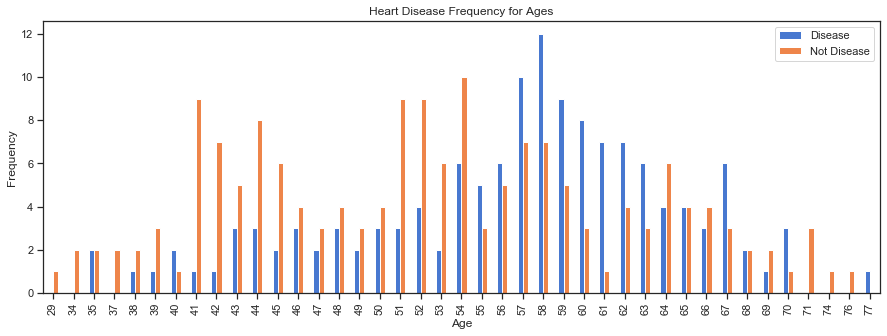

In [18]:
#Heart disease frequency for different ages
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Disease", "Not Disease"])
plt.show()

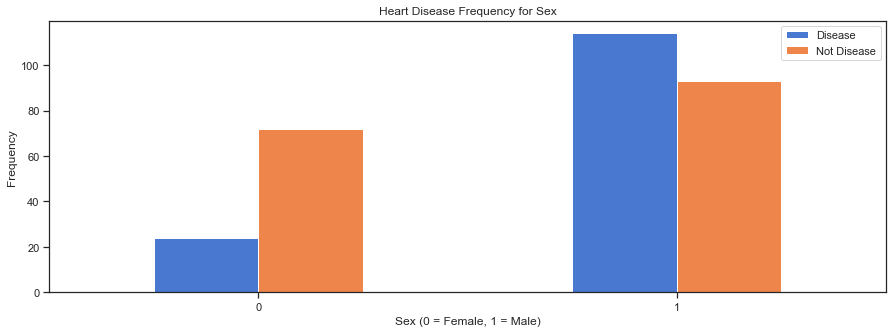

In [19]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Disease", "Not Disease"])
plt.ylabel('Frequency')
plt.show()

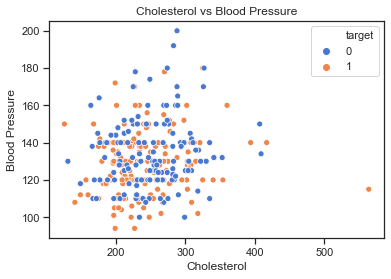

In [20]:
sns.scatterplot(x="chol", y="trestbps", hue="target", data=df)
plt.title('Cholesterol vs Blood Pressure')
plt.xlabel("Cholesterol")
plt.ylabel("Blood Pressure")
plt.show()

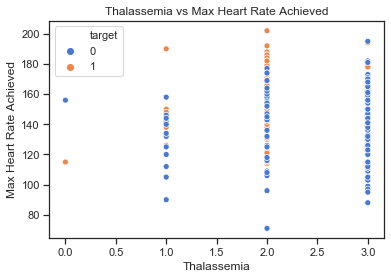

In [21]:
sns.scatterplot(x="thal", y="thalach", hue="target", data=df)
plt.title('Thalassemia vs Max Heart Rate Achieved')
plt.xlabel("Thalassemia")
plt.ylabel("Max Heart Rate Achieved")
plt.show()

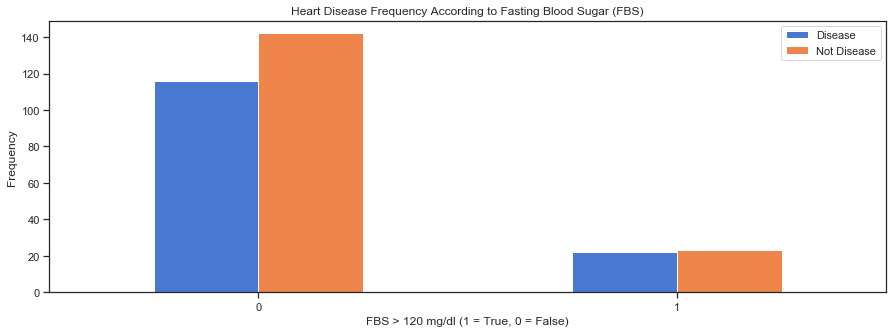

In [22]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar (FBS)')
plt.xlabel('FBS > 120 mg/dl (1 = True, 0 = False)')
plt.xticks(rotation=0)
plt.legend(["Disease", "Not Disease"])
plt.ylabel('Frequency')
plt.show()

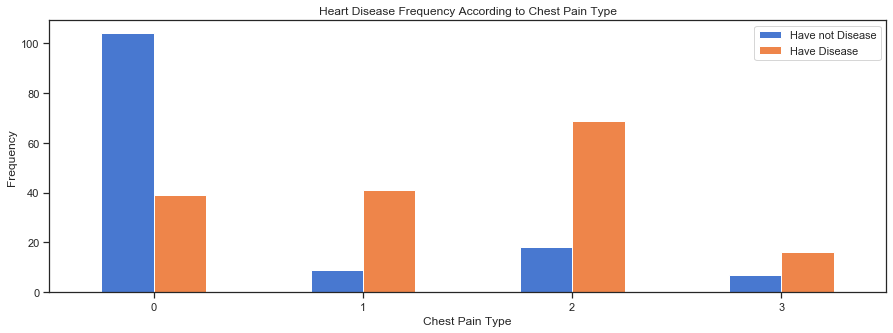

In [23]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.legend(["Have not Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()